<h1 style='color:#0000ec'>8 &nbsp;Estudo comparativo - Soluções numéricas e analítica</h1>

&nbsp; &nbsp; &nbsp; Importando bibliotecas <i><b>Numpy</b></i> e <i><b>Matplotlib</b></i>:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp; &nbsp; &nbsp; Importando bibliotecas <i><b>SciPy</b></i> :

In [2]:
import scipy.integrate as sciInt

&nbsp; &nbsp; &nbsp; Importando bibliotecas <i><b>display</b></i> para exibir tabelas HTML por meio do python:

In [3]:
from IPython.display import HTML, display

&nbsp; &nbsp; &nbsp; Importando os modelos de <b>Malthus</b>, <b>Verhulst</b> e <b>Montroll</b>:

In [4]:
import sys
sys.path.insert(0,'../python')

from modelo_malthus import modelo_malthus
from modelo_verhulst import modelo_verhulst
from modelo_montroll import modelo_montroll
from f_malthus import f_malthus
from f_verhulst import f_verhulst
from f_montroll import f_montroll

&nbsp; &nbsp; &nbsp; Importando os métodos de solução:

In [5]:
from sol_euler import sol_euler
from sol_euler_mod import sol_euler_mod
from sol_rk4 import sol_rk4

&nbsp; &nbsp; &nbsp; Declarando vetor contendo a população de Rio Grande, segundo o DATASUS, entre os anos de 2010 e 2012.

In [6]:
dados_datasus = [197228, 198049, 198842]
dsus = [197228, 198049, 198842,0]

<h2 style='color:#0000b7' >&nbsp; 8.1 &nbsp;Obtendo aproximações numéricas e analítica</h2>

&nbsp; &nbsp; &nbsp; Declarando o passo de derivação <b>h</b>, a condição inicial <b>T0</b>, o tempo inicial <b>ti</b>, o tempo final <b>tf</b> e o intervalo de tempo <b>vt</b>:

In [7]:
h = 0.001 #Passo de derivação

P0 = 197228 #Condição inicial

ti = 0 #tempo inicial

tf = 12 #tempo final

vt = np.arange(ti,tf,h) #Intervalo de 10 à 21 anos com passo h

#vetor de posições para os intantes 0, 0.5, 1, 1.5, 2, 2.5 e 3: 
pos = [np.where(vt == 0),np.where(vt == 1),np.where(vt == 2),np.where(vt == 3),np.where(vt == 4),np.where(vt == 5),np.where(vt == 6)]
pos2 = [np.where(vt == 0),np.where(vt == 1),np.where(vt == 2)]
pos

[(array([0], dtype=int64),),
 (array([1000], dtype=int64),),
 (array([2000], dtype=int64),),
 (array([3000], dtype=int64),),
 (array([4000], dtype=int64),),
 (array([5000], dtype=int64),),
 (array([6000], dtype=int64),)]

&nbsp; &nbsp; &nbsp; Obtendo solução analítica e segundo os métodos <b>LSODA</b>, <b>RK45</b>, <b>Euler</b>, <b>Euler modificado</b> e <b>RK4</b> para o modelo de <b>Malthus</b>:

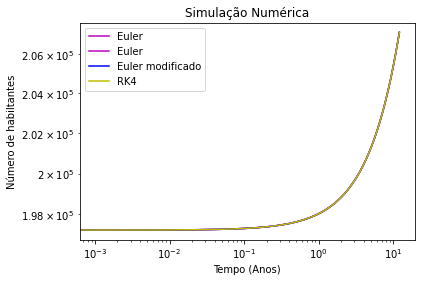

In [8]:
malthus_analitico = 197228*np.exp(0.00407*vt)

malthus_sympy = 197228*np.exp(0.00407*vt)

malthus_lsoda = sciInt.odeint(modelo_malthus, y0=P0, t=vt, tfirst=True)

malthus_rk45 = sciInt.solve_ivp(modelo_malthus, t_span=(0,max(vt)), y0=[P0], t_eval=vt)

malthus_euler = sol_euler(vt,P0,f_malthus)

malthus_euler_mod = sol_euler_mod(vt,P0,f_malthus)

malthus_rk4 = sol_rk4(vt,P0,f_malthus)

plt.plot(vt,malthus_analitico,'m',label='Euler')
plt.plot(vt,malthus_euler,'m',label='Euler')
plt.plot(vt,malthus_euler_mod,'b',label='Euler modificado')
plt.plot(vt,malthus_rk4 ,'y',label='RK4')

plt.title('Simulação Numérica')
plt.xlabel('Tempo (Anos)')
plt.ylabel('Número de habiltantes')
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.show()

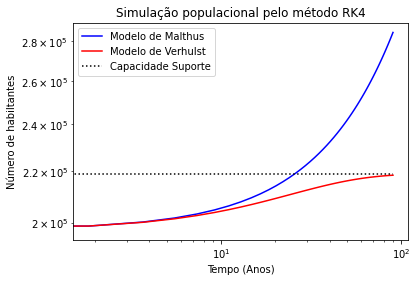

In [9]:
L = 218858 #Limite 

t_lim = np.linspace(0,90)
sol_lim_verhulst = sol_rk4(t_lim,P0,f_verhulst)
sol_lim_malthus = sol_rk4(t_lim,P0,f_malthus)

plt.plot(t_lim,sol_lim_malthus,'b',label='Modelo de Malthus')
plt.plot(t_lim,sol_lim_verhulst,'r',label='Modelo de Verhulst')
plt.plot(t_lim,np.full(t_lim.shape[0], L),"k", linestyle = 'dotted', label='Capacidade Suporte') #Assíntota

plt.title('Simulação populacional pelo método RK4')
plt.xlabel('Tempo (Anos)')
plt.ylabel('Número de habiltantes')
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.show()

&nbsp; &nbsp; &nbsp; Obtendo solução analítica e segundo os métodos <b>LSODA</b>, <b>RK45</b>, <b>Euler</b>, <b>Euler modificado</b> e <b>RK4</b> para o modelo de <b>Verhulst</b>:

In [10]:
vt1 = np.arange(0,2,0.001)

verhulst_analitico = (218858*197228*np.exp(0.04285*vt))/(218858+197228*(np.exp(0.04285*vt)-1))
verhulst_analitico1 = (218858*197228*np.exp(0.04285*vt1))/(218858+197228*(np.exp(0.04285*vt1)-1))

verhulst_sympy = 218858/(1+0.109670026568236*np.exp(-0.04285*vt))

verhulst_lsoda = sciInt.odeint(modelo_verhulst, y0=P0, t=vt, tfirst=True)

verhulst_rk45 = sciInt.solve_ivp(modelo_verhulst, t_span=(0,max(vt)), y0=[P0], t_eval=vt)

verhulst_euler = sol_euler(vt,P0,f_verhulst)

verhulst_euler_mod = sol_euler_mod(vt,P0,f_verhulst)

verhulst_rk4 = sol_rk4(vt,P0,f_verhulst)

print()
print(malthus_lsoda[5000])
print(verhulst_lsoda[5000])


[201282.70651097]
[201060.19427949]


In [11]:
print('Modelo de Malthus')

tabela = ['t','Dados Reais','Solução Analítica','Euler','Euler-Modificado','RK4']

arr = 3

for k in range(0,3):
    i = pos2[k][0][0]
    tabela = np.vstack([tabela,[k,round(dados_datasus[k]),round(malthus_analitico[i]),round(malthus_euler[i],arr),round(malthus_euler_mod[i],arr),round(malthus_rk4[i],arr)]])
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tabela)
       )
))

print('Modelo de Verhulst')

tabela = ['t','Dados Reais','Solução Analítica','Euler','Euler-Modificado','RK4']

arr = 3

for k in range(0,3):
    i = pos2[k][0][0]
    tabela = np.vstack([tabela,[k,round(dados_datasus[k]),round(verhulst_analitico[i]),round(verhulst_euler[i],arr),round(verhulst_euler_mod[i],arr),round(verhulst_rk4[i],arr)]])
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tabela)
       )
))

Modelo de Malthus


t,Dados Reais,Solução Analítica,Euler,Euler-Modificado,RK4
0.0,197228.0,197228.0,197228.0,197228.0,197228.0
1.0,198049.0,198032.0,198032.352,198032.354,198032.354
2.0,198842.0,198840.0,198839.985,198839.988,198839.988


Modelo de Verhulst


t,Dados Reais,Solução Analítica,Euler,Euler-Modificado,RK4
0.0,197228.0,197228.0,197228.0,197228.0,197228.0
1.0,198049.0,198049.0,198049.019,198049.005,198049.005
2.0,198842.0,198842.0,198842.038,198842.011,198842.011


&nbsp; &nbsp; &nbsp; Obtendo solução analítica e segundo os métodos <b>LSODA</b>, <b>RK45</b>, <b>Euler</b>, <b>Euler modificado</b> e <b>RK4</b> para o modelo de <b>Montroll</b>:

Modelo de Montroll


t,Dados Reais,Solução Analítica,Euler,Euler-Modificado,RK4
0.0,197228.0,197233.0,197233.192,197233.192,197233.192
1.0,198049.0,198039.0,198038.571,198038.572,198038.572
2.0,198842.0,198847.0,198847.232,198847.235,198847.235


198847.2348276467
[(array([0], dtype=int64),), (array([1000], dtype=int64),), (array([2000], dtype=int64),), (array([3000], dtype=int64),), (array([4000], dtype=int64),), (array([5000], dtype=int64),), (array([6000], dtype=int64),)]
montroll2023,  207113.5454996113


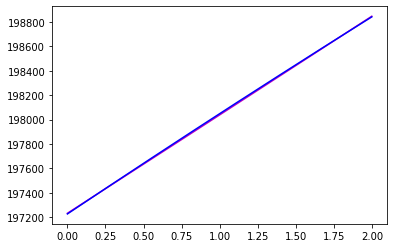

In [12]:
c = 92269.66046549017
r =  0.004075131037140572
l = 109.8892759720857
L = 218858

montroll_analitico = L/(1+c*np.exp(-l*r*vt))**(1/l)
montroll_analitico1 = L/(1+c*np.exp(-l*r*vt1))**(1/l)

montroll_lsoda = sciInt.odeint(modelo_montroll, y0=P0, t=vt, tfirst=True)

montroll_rk45 = sciInt.solve_ivp(modelo_montroll, t_span=(0,max(vt)), y0=[P0], t_eval=vt)

P01 = 197233.19241797953

montroll_euler = sol_euler(vt,P01,f_montroll)

montroll_euler_mod = sol_euler_mod(vt,P01,f_montroll)

montroll_rk4 = sol_rk4(vt,P01,f_montroll)


print('Modelo de Montroll')

tabela = ['t','Dados Reais','Solução Analítica','Euler','Euler-Modificado','RK4']

arr = 3

for k in range(0,3):
    i = pos2[k][0][0]
    tabela = np.vstack([tabela,[k,round(dados_datasus[k],arr),round(montroll_analitico[i]),round(montroll_euler[i],arr),round(montroll_euler_mod[i],arr),round(montroll_rk4[i],arr)]])
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tabela)
       )
))

print(montroll_analitico[2000])
print(pos)

plt.plot(vt1,montroll_analitico1,'m',label='Analitico')
plt.plot(vt1,verhulst_analitico1,'b',label='Analitico')
#plt.yscale("log")
#plt.xscale("log")
plt.plot()

print('montroll2023, ',L/(1+c*np.exp(-l*r*12))**(1/l))

<h2 style='color:#0000b7' >&nbsp; 8.2 &nbsp;Erro entre as soluções numéricas e analíticas</h2>

In [13]:
err_malthus_euler = abs(malthus_analitico - malthus_euler)
err_malthus_euler_mod = abs(malthus_analitico - malthus_euler_mod)
err_malthus_rk4 = abs(malthus_analitico - malthus_rk4)
err_malthus_lsoda = abs(malthus_analitico - malthus_lsoda[0])
err_malthus_rk45 = abs(malthus_analitico - malthus_rk45.y[0])

tabela = ['t','Euler','Euler-Modificado','RK4','RK45','LSODA']

arr = 10

for k in range(0,6):
    i = pos[k][0][0]
    a = round(abs(err_malthus_euler[i]/malthus_analitico[i])*100,2)
    tabela = np.vstack([tabela,[i,round(err_malthus_euler[i],arr),round(err_malthus_euler_mod[i],arr),round(err_malthus_rk4[i],arr),round(err_malthus_rk45[i],arr),round(err_malthus_lsoda[i],arr)]])
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tabela)
       )
))

t,Euler,Euler-Modificado,RK4,RK45,LSODA
0.0,0.0,0.0,0.0,0.0,0.0
1000.0,0.0016401885,2e-09,1e-10,1.15e-08,804.3537094625
2000.0,0.0032937551,4.3e-09,1e-10,1.28e-08,1611.9878095892
3000.0,0.0049607821,6.6e-09,1e-10,7e-10,2422.9156787768
4000.0,0.0066413514,8.7e-09,2e-10,4.662e-07,3237.1507499828
5000.0,0.0083355458,1.08e-08,5e-10,1.8677e-06,4054.7065109482


In [14]:
err_verhulst_euler = abs(verhulst_analitico - verhulst_euler)
err_verhulst_euler_mod = abs(verhulst_analitico - verhulst_euler_mod)
err_verhulst_rk4 = abs(verhulst_analitico - verhulst_rk4)
err_verhulst_lsoda = abs(verhulst_analitico - verhulst_lsoda[0])
err_verhulst_rk45 = abs(verhulst_analitico - verhulst_rk45.y[0])

tabela = ['t','Euler','Euler-Modificado','RK4','RK45','LSODA']

arr = 11

for k in range(0,6):
    i = pos[k][0][0]
    a = round(abs(err_verhulst_euler[i]/verhulst_analitico[i])*100,2)
    tabela = np.vstack([tabela,[i,round(err_verhulst_euler[i],arr),round(err_verhulst_euler_mod[i],arr),round(err_verhulst_rk4[i],arr),round(err_verhulst_rk45[i],arr),round(err_verhulst_lsoda[i],arr)]])
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tabela)
       )
))

t,Euler,Euler-Modificado,RK4,RK45,LSODA
0.0,0.0,0.0,0.0,0.0,0.0
1000.0,0.01393595719,1.8178e-07,3e-11,1.534616e-05,821.00547137143
2000.0,0.02704021186,3.5312e-07,1.5e-10,9.644162e-05,1614.01080511374
3000.0,0.03933309802,5.1482e-07,6.1e-10,1.274567e-05,2379.73308970733
4000.0,0.05083622946,6.6636e-07,9e-10,0.00138689508,3118.88929167658
5000.0,0.06157230071,8.0827e-07,1.16e-09,0.00744459286,3832.19457823556


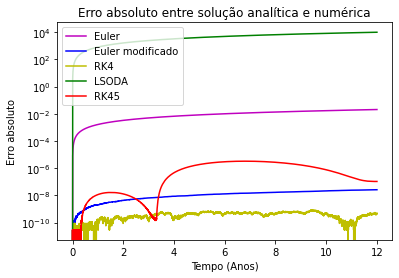

In [15]:
plt.plot(vt,err_malthus_euler,'m',label='Euler')
plt.plot(vt,err_malthus_euler_mod,'b',label='Euler modificado')
plt.plot(vt,err_malthus_rk4 ,'y',label='RK4')
plt.plot(vt,err_malthus_lsoda,'g',label='LSODA')
plt.plot(vt,err_malthus_rk45,'r',label='RK45')

plt.title('Erro absoluto entre solução analítica e numérica')
plt.xlabel('Tempo (Anos)')
plt.ylabel('Erro absoluto')
plt.legend()
plt.yscale("log")
plt.show()

<h2 style='color:#0000b7' >&nbsp; 8.2 &nbsp;Calculando o erro para 2010-2012</h2>

&nbsp; &nbsp; &nbsp; A seguir, escrevemos a função <i><b>erro_datasus(	&lt;dados do DATASUS>,	&lt;Vetor solução>)</b></i> o erro das soluções obtidas com relação a população fornecida pelo DATASUS.

In [16]:
%%writefile ../python/erro_datasus.py

import numpy as np

def erro_datasus(dados_datasus,solucoes,metodo):
    
    dados = [[0, 0, 0, 0, 0]]
    
    for i in range(0,3):
        
        if metodo=='lsoda':
            
            solucao = solucoes[i][0]
            
        elif metodo=='rk45':
            
            solucao = solucoes.y[0][i]
        
        else:
            
            solucao = solucoes[i]
            
        erro_hab = dados_datasus[i] - solucao
        #print(erro_hab)
        erro_perc = (erro_hab/dados_datasus[i])*100
        #Adicionando linhas à matriz (tabela)
        dados = np.vstack([dados,[i,dados_datasus[i],round(solucao,2),round(erro_hab),str(round(erro_perc,2))+'%']])
        #dados = np.vstack([dados,[i,dados_datasus[i],round(solucao,2),round(erro_hab),str(erro_perc)+'%']])
        
    #remove a primeira linha da matriz
    dados = np.delete(dados, 0, 0)
    
    return dados

Overwriting ../python/erro_datasus.py


&nbsp; &nbsp; &nbsp; Importando função escrita em <b>[11]</b>

In [17]:
import sys
sys.path.insert(0, '../python')
from erro_datasus import erro_datasus

&nbsp; &nbsp; &nbsp; Atribuindo as aproximações à funções <i><b>erro_ibge</b></i>.

In [18]:
print(malthus_lsoda[0][0])

197228.0


In [19]:
err_malthus_analitico = erro_datasus(dados_datasus,malthus_analitico,'')

err_malthus_sympy = erro_datasus(dados_datasus,malthus_sympy,'')

err_malthus_lsoda = erro_datasus(dados_datasus,malthus_lsoda,'lsoda')

err_malthus_rk45 = erro_datasus(dados_datasus,malthus_rk45,'rk45')

err_malthus_euler = erro_datasus(dados_datasus,malthus_euler,'')

err_malthus_euler_mod = erro_datasus(dados_datasus,malthus_euler_mod,'')

err_malthus_rk4 = erro_datasus(dados_datasus,malthus_rk4,'')

In [20]:
err_verhulst_analitico = erro_datasus(dados_datasus,verhulst_analitico,'')

err_verhulst_sympy = erro_datasus(dados_datasus,verhulst_sympy,'')

err_verhulst_lsoda = erro_datasus(dados_datasus,verhulst_lsoda,'lsoda')

err_verhulst_rk45 = erro_datasus(dados_datasus,verhulst_rk45,'rk45')

err_verhulst_euler = erro_datasus(dados_datasus,verhulst_euler,'')

err_verhulst_euler_mod = erro_datasus(dados_datasus,verhulst_euler_mod,'')

err_verhulst_rk4 = erro_datasus(dados_datasus,verhulst_rk4,'')

In [21]:
err_montroll_analitico = erro_datasus(dados_datasus,montroll_analitico,'')

#err_montroll_sympy = erro_datasus(dados_datasus,montroll_sympy,'')

err_montroll_lsoda = erro_datasus(dados_datasus,montroll_lsoda,'lsoda')

err_montroll_rk45 = erro_datasus(dados_datasus,montroll_rk45,'rk45')

err_montroll_euler = erro_datasus(dados_datasus,montroll_euler,'')

err_montroll_euler_mod = erro_datasus(dados_datasus,montroll_euler_mod,'')

err_montroll_rk4 = erro_datasus(dados_datasus,montroll_rk4,'')

<h2 style='color:#0000b7' >&nbsp; 8.3 &nbsp;Apresentação dos dados sobre o modelo de Malthus</h2>

&nbsp; &nbsp; &nbsp; Finalmente, exibimos os dados armazenados:

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.3.1 &nbsp;Malthus - SymPy (Analítico)</h3>

In [22]:
display(HTML(
   '<table><tr><td>t</td><td>Dados reais</td><td>Aproximação</td><td>Erro absoluto</td><td>Erro percentual</td></tr><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in err_malthus_analitico))))

t,Dados reais,Aproximação,Erro absoluto,Erro percentual
0,197228,197228.0,0,0.0%
1,198049,197228.8,820,0.41%
2,198842,197229.61,1612,0.81%


<h3 style='color:#b50000' >&nbsp; &nbsp; 8.3.2 &nbsp;Malthus - SciPy (LSODA)</h3>

In [23]:
display(HTML(
   '<table><tr><td>t</td><td>Dados reais</td><td>Aproximação</td><td>Erro absoluto</td><td>Erro percentual</td></tr><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in err_malthus_lsoda))))

t,Dados reais,Aproximação,Erro absoluto,Erro percentual
0,197228,197228.0,0,0.0%
1,198049,197228.8,820,0.41%
2,198842,197229.61,1612,0.81%


<h3 style='color:#b50000' >&nbsp; &nbsp; 8.3.3 &nbsp;Malthus - SciPy (RK45)</h3>

In [24]:
display(HTML(
   '<table><tr><td>t</td><td>Dados reais</td><td>Aproximação</td><td>Erro absoluto</td><td>Erro percentual</td></tr><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in err_malthus_rk45))))

t,Dados reais,Aproximação,Erro absoluto,Erro percentual
0,197228,197228.0,0,0.0%
1,198049,197228.8,820,0.41%
2,198842,197229.61,1612,0.81%


<h3 style='color:#b50000' >&nbsp; &nbsp; 8.3.4 &nbsp;Malthus - Método de Euler</h3>

In [25]:
display(HTML(
   '<table><tr><td>t</td><td>Dados reais</td><td>Aproximação</td><td>Erro absoluto</td><td>Erro percentual</td></tr><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in err_malthus_euler)
       )
))

t,Dados reais,Aproximação,Erro absoluto,Erro percentual
0,197228,197228.0,0,0.0%
1,198049,197228.8,820,0.41%
2,198842,197229.61,1612,0.81%


<h3 style='color:#b50000' >&nbsp; &nbsp; 8.3.5 &nbsp;Malthus - Método de Euler modificado</h3>

In [26]:
display(HTML(
   '<table><tr><td>t</td><td>Dados reais</td><td>Aproximação</td><td>Erro absoluto</td><td>Erro percentual</td></tr><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in err_malthus_euler_mod))))

t,Dados reais,Aproximação,Erro absoluto,Erro percentual
0,197228,197228.0,0,0.0%
1,198049,197228.8,820,0.41%
2,198842,197229.61,1612,0.81%


<h3 style='color:#b50000' >&nbsp; &nbsp; 8.3.6 &nbsp;Malthus - Método Runge-Kutta de 4a ordem</h3>

In [27]:
display(HTML(
   '<table><tr><td>t</td><td>Dados reais</td><td>Aproximação</td><td>Erro absoluto</td><td>Erro percentual</td></tr><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in err_malthus_rk4))))

t,Dados reais,Aproximação,Erro absoluto,Erro percentual
0,197228,197228.0,0,0.0%
1,198049,197228.8,820,0.41%
2,198842,197229.61,1612,0.81%


<h2 style='color:#0000b7' >&nbsp; 8.4 &nbsp;Apresentação dos dados sobre o modelo de Verhulst</h2>

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.4.1 &nbsp;Verhulst - SymPy (Analítico)</h3>

In [28]:
display(HTML(
   '<table><tr><td>t</td><td>Dados reais</td><td>Aproximação</td><td>Erro absoluto</td><td>Erro percentual</td></tr><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in err_verhulst_sympy))))

t,Dados reais,Aproximação,Erro absoluto,Erro percentual
0,197228,197228.0,0,0.0%
1,198049,197228.84,820,0.41%
2,198842,197229.67,1612,0.81%


<h3 style='color:#b50000' >&nbsp; &nbsp; 8.4.2 &nbsp;Verhulst - SciPy (LSODA)</h3>

In [29]:
display(HTML(
   '<table><tr><td>t</td><td>Dados reais</td><td>Aproximação</td><td>Erro absoluto</td><td>Erro percentual</td></tr><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in err_verhulst_lsoda))))

t,Dados reais,Aproximação,Erro absoluto,Erro percentual
0,197228,197228.0,0,0.0%
1,198049,197228.84,820,0.41%
2,198842,197229.67,1612,0.81%


<h3 style='color:#b50000' >&nbsp; &nbsp; 8.4.3 &nbsp;Verhulst - SciPy (RK45)</h3>

In [30]:
display(HTML(
   '<table><tr><td>t</td><td>Dados reais</td><td>Aproximação</td><td>Erro absoluto</td><td>Erro percentual</td></tr><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in err_verhulst_rk45))))

t,Dados reais,Aproximação,Erro absoluto,Erro percentual
0,197228,197228.0,0,0.0%
1,198049,197228.84,820,0.41%
2,198842,197229.67,1612,0.81%


<h3 style='color:#b50000' >&nbsp; &nbsp; 8.4.4 &nbsp;Verhulst - Método de Euler</h3>

In [31]:
display(HTML(
   '<table><tr><td>t</td><td>Dados reais</td><td>Aproximação</td><td>Erro absoluto</td><td>Erro percentual</td></tr><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in err_verhulst_euler))))

t,Dados reais,Aproximação,Erro absoluto,Erro percentual
0,197228,197228.0,0,0.0%
1,198049,197228.84,820,0.41%
2,198842,197229.67,1612,0.81%


<h3 style='color:#b50000' >&nbsp; &nbsp; 8.4.5 &nbsp;Verhulst - Método de Euler modificado</h3>

In [32]:
display(HTML(
   '<table><tr><td>t</td><td>Dados reais</td><td>Aproximação</td><td>Erro absoluto</td><td>Erro percentual</td></tr><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in err_verhulst_euler_mod))))

t,Dados reais,Aproximação,Erro absoluto,Erro percentual
0,197228,197228.0,0,0.0%
1,198049,197228.84,820,0.41%
2,198842,197229.67,1612,0.81%


<h3 style='color:#b50000' >&nbsp; &nbsp; 8.4.6 &nbsp;Verhulst - Método de Runge-Kutta de 4a ordem</h3>

In [33]:
display(HTML(
   '<table><tr><td>t</td><td>Dados reais</td><td>Aproximação</td><td>Erro absoluto</td><td>Erro percentual</td></tr><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in err_verhulst_rk45))))

t,Dados reais,Aproximação,Erro absoluto,Erro percentual
0,197228,197228.0,0,0.0%
1,198049,197228.84,820,0.41%
2,198842,197229.67,1612,0.81%


<h2 style='color:#0000b7' >&nbsp; 8.5 &nbsp;Apresentação dos dados sobre o modelo de Montroll</h2>

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.5.1 &nbsp;Montroll - SciPy (LSODA)</h3>

In [34]:
display(HTML(
   '<table><tr><td>t</td><td>Dados reais</td><td>Aproximação</td><td>Erro absoluto</td><td>Erro percentual</td></tr><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in err_montroll_lsoda))))

t,Dados reais,Aproximação,Erro absoluto,Erro percentual
0,197228,197228.0,0,0.0%
1,198049,197228.79,820,0.41%
2,198842,197229.58,1612,0.81%


<h2 style='color:#0000b7' >&nbsp; 8.6 &nbsp;Erro entre a solução numérica e analítica</h2>

In [35]:
from f_erro import f_erro

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.6.1 &nbsp;Modelo de Malthus</h3>

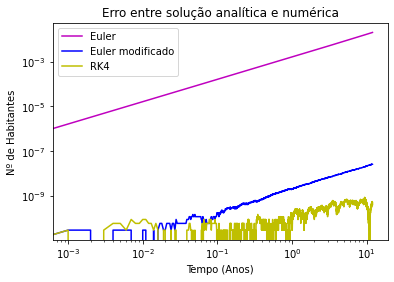

In [36]:
#err_num = malthus_analitico - malthus_lsoda
#plt.plot(vt,abs(err_num),'m',label='LSODA')
#plt.plot(vt,abs(f_erro(malthus_analitico,malthus_rk45.y[0])),'c',label='RK45')
plt.plot(vt,abs(malthus_analitico-malthus_euler),'m',label='Euler')
plt.plot(vt,abs(malthus_analitico-malthus_euler_mod),'b',label='Euler modificado')
plt.plot(vt,abs(malthus_analitico-malthus_rk4),'y',label='RK4')

plt.title('Erro entre solução analítica e numérica')
plt.xlabel('Tempo (Anos)')
plt.ylabel('Nº de Habitantes')
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

<h2 style='color:#0000b7' >&nbsp; 8.7 &nbsp;Simulação para o ano de 2021</h2>

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.3.1 &nbsp;Modelo de Malthus</h3>

In [37]:
%%writefile ../python/erro_n.py

import numpy as np

def erro_n(dados,hab_real,approx,metodo):
    
    erro_hab = abs(hab_real - approx)
    erro_perc = (erro_hab/hab_real)*100
    dados = np.vstack([dados,[str(metodo),hab_real,round(approx,2),round(erro_hab),str(round(erro_perc,2))+'%']])
    
    return dados

Overwriting ../python/erro_n.py


In [38]:
from erro_n import erro_n

Erro entre a estimativa do IBGE e solução numérica para 2021


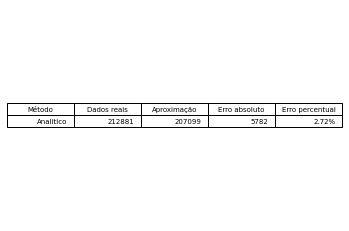

[['Analitico' '212881' '207099' '5782' '2.72%']]


In [39]:
hab_real = 212881
dados = [[0, 0, 0, 0, 0]]
dados = erro_n(dados,hab_real,round(malthus_analitico[-1]),'Analitico')
#dados = erro_n(dados,hab_real,malthus_sympy[-1],'SymPy')
#dados = erro_n(dados,hab_real,malthus_lsoda[-1][0],'LSODA')
#dados = erro_n(dados,hab_real,malthus_rk45.y[0][-1],'RK45')
#dados = erro_n(dados,hab_real,malthus_euler[-1],'Euler')
#dados = erro_n(dados,hab_real,malthus_euler_mod[-1],'Euler modif')
#dados = erro_n(dados,hab_real,malthus_rk4[-1],'RK4')
dados = np.delete(dados, 0, 0)

fig, ax =plt.subplots(1,1)
column_labels=['Método','Dados reais','Aproximação', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')

print('Erro entre a estimativa do IBGE e solução numérica para 2021')
ax.table(cellText=dados,colLabels=column_labels,loc='center')
plt.show()

print(dados)

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.3.2 &nbsp;Modelo de Verhulst</h3>

Erro entre a estimativa do IBGE e solução numérica para 2021


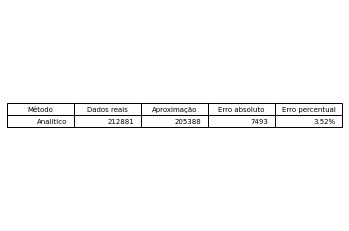

[['Analitico' '212881' '205388' '7493' '3.52%']]


In [40]:
hab_real = 212881
dados = [[0, 0, 0, 0, 0]]
dados = erro_n(dados,hab_real,round(verhulst_analitico[-1]),'Analitico')
#dados = erro_n(dados,hab_real,verhulst_sympy[-1],'SymPy')
#dados = erro_n(dados,hab_real,verhulst_lsoda[-1][0],'LSODA')
#dados = erro_n(dados,hab_real,verhulst_rk45.y[0][-1],'RK45')
#dados = erro_n(dados,hab_real,verhulst_euler[-1],'Euler')
#dados = erro_n(dados,hab_real,verhulst_euler_mod[-1],'Euler modif')
#dados = erro_n(dados,hab_real,verhulst_rk4[-1],'RK4')
dados = np.delete(dados, 0, 0)

fig, ax =plt.subplots(1,1)
column_labels=['Método','Dados reais','Aproximação', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')

print('Erro entre a estimativa do IBGE e solução numérica para 2021')
ax.table(cellText=dados,colLabels=column_labels,loc='center')
plt.show()

print(dados)

In [41]:
print('ver: ',round(verhulst_analitico[-1]))
print('mal: ',round(malthus_analitico[-1]))
print('mon: ',round(montroll_analitico[-1]))

ver:  205388
mal:  207099
mon:  207113
